<a href="https://colab.research.google.com/github/smraytech/test/blob/main/Final_Project_AI%26App_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci

#Business Context

A client is a UK-based online retail company. They have provided transactional data with invoices, products, customers, quantities, and timestamps. The company seeks insights into product performance, customer behavior, and sales trends to optimize inventory, marketing, and customer retention strategies. As a data science consultant, I will perform exploratory data analysis (EDA) to uncover actionable business insights.

Problem Statement

The client is a UK-based online retail company that sells gifts and household items internationally. They have provided a dataset of transactional records containing invoice numbers, product descriptions, quantities, prices, timestamps, customer IDs, and countries.

The company faces several challenges:

Limited understanding of customer purchasing behavior.

Lack of insights into top-performing products, geographic markets, and seasonal patterns.

High product returns that may impact profitability.

No structured way to identify valuable customers for loyalty/retention strategies.

No clear knowledge of cross-selling opportunities (product bundles).


#Online Retail II - EDA Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_Aug = pd.read_csv('/content/online_retail_II.csv')

In [ ]:
df_Aug.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df_Aug.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [ ]:
print("shape:",df_Aug.shape)

shape: (1067371, 8)


Checking for duplicates

In [ ]:
df_Aug.duplicated().sum()

np.int64(34335)

Ensure plots display nicely

In [ ]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10,6)

In [ ]:
df_Aug.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Invoice,1067371,53628,537434,1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,1067371,5305,85123A,5829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1062989,5698,WHITE HANGING HEART T-LIGHT HOLDER,5918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1067371.0,NaN,NaN,NaN,9.938898,172.705794,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,1067371,47635,2010-12-06 16:57:00,1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,1067371.0,NaN,NaN,NaN,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,824364.0,NaN,NaN,NaN,15324.638504,1697.46445,12346.0,13975.0,15255.0,16797.0,18287.0
Country,1067371,43,United Kingdom,981330,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check missing values

In [ ]:
df_Aug.isnull().sum()

,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


Cleaning: drop NA CustomerID

In [ ]:
df_Aug = df_Aug.dropna(subset=['Customer ID'])

In [ ]:
df_Aug.isnull().sum().sum()

np.int64(0)

Convert InvoiceDate to datetime

In [ ]:
df_Aug["InvoiceDate"] = pd.to_datetime(df_Aug["InvoiceDate"])

In [ ]:
df_Aug.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


Adding total revenue column

In [ ]:
df_Aug["Revenue"] = df_Aug["Quantity"] * df_Aug["Price"]

In [ ]:
df_Aug.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Revenue'],
      dtype='object')

#Business Questions (Top selling Products)

# Q1: Which factors are most strongly  correlated with revenue in the online retail dataset?

Explanation:
The heatmap visually highlights that Quantity and Revenue have a moderate positive relationship, Price and Revenue are moderately negatively correlated, while Customer ID shows minimal correlation with other variables.

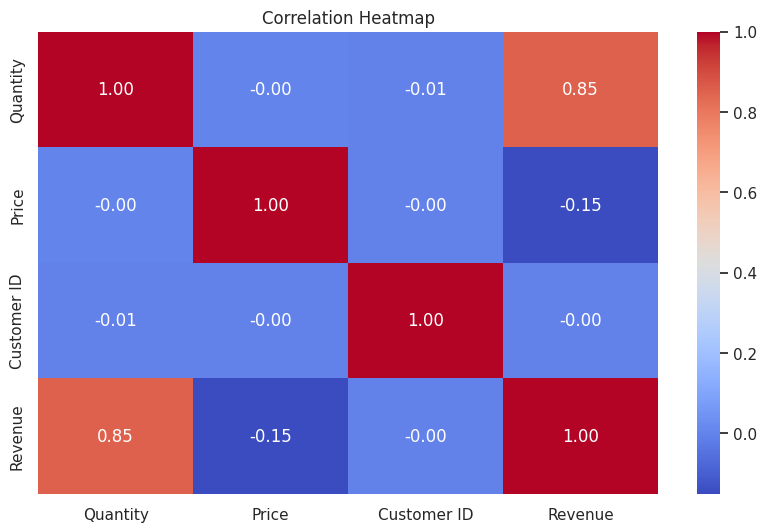

In [ ]:
corr = df_Aug.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df_Aug.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Revenue'],
      dtype='object')

#Q2: What are the top-selling products by units and revenue?

Eplanation:
The two bar charts compare the top 10 products by units sold and by revenue.Defining that "WHITE HANGING HEART T-LIGHT HOLDER" leads in both categories,but other products differ between the lists,highlighting how high sales volume does not always correspond tp high revenue.


Top product by units

In [ ]:
top_units = df_Aug.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

In [ ]:
print (top_units)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     107489
WHITE HANGING HEART T-LIGHT HOLDER     90008
ASSORTED COLOUR BIRD ORNAMENT          79434
JUMBO BAG RED RETROSPOT                74564
BROCADE RING PURSE                     70390
PACK OF 60 PINK PAISLEY CAKE CASES     55051
60 TEATIME FAIRY CAKE CASES            53169
PACK OF 72 RETROSPOT CAKE CASES        45742
PACK OF 72 RETRO SPOT CAKE CASES       44507
SMALL POPCORN HOLDER                   43602
Name: Quantity, dtype: int64


Products by revenue

In [ ]:
top_revenue = df_Aug.groupby("Description")["Revenue"].sum().sort_values(ascending=False).head(10)

In [ ]:
print("Top 10 products by units sold:")
display(top_units)

Top 10 products by units sold:


,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,107489
WHITE HANGING HEART T-LIGHT HOLDER,90008
ASSORTED COLOUR BIRD ORNAMENT,79434
JUMBO BAG RED RETROSPOT,74564
BROCADE RING PURSE,70390
PACK OF 60 PINK PAISLEY CAKE CASES,55051
60 TEATIME FAIRY CAKE CASES,53169
PACK OF 72 RETROSPOT CAKE CASES,45742
PACK OF 72 RETRO SPOT CAKE CASES,44507


In [ ]:
print("\nTop 10 products by revenue:")
display(top_revenue)


Top 10 products by revenue:


,Revenue
Description,
REGENCY CAKESTAND 3 TIER,269736.70
WHITE HANGING HEART T-LIGHT HOLDER,242700.51
JUMBO BAG RED RETROSPOT,134845.16
ASSORTED COLOUR BIRD ORNAMENT,126354.18
POSTAGE,112249.10
PARTY BUNTING,102686.23
PAPER CHAIN KIT 50'S CHRISTMAS,78366.93
CHILLI LIGHTS,72229.34
BLACK RECORD COVER FRAME,67127.15


Plot

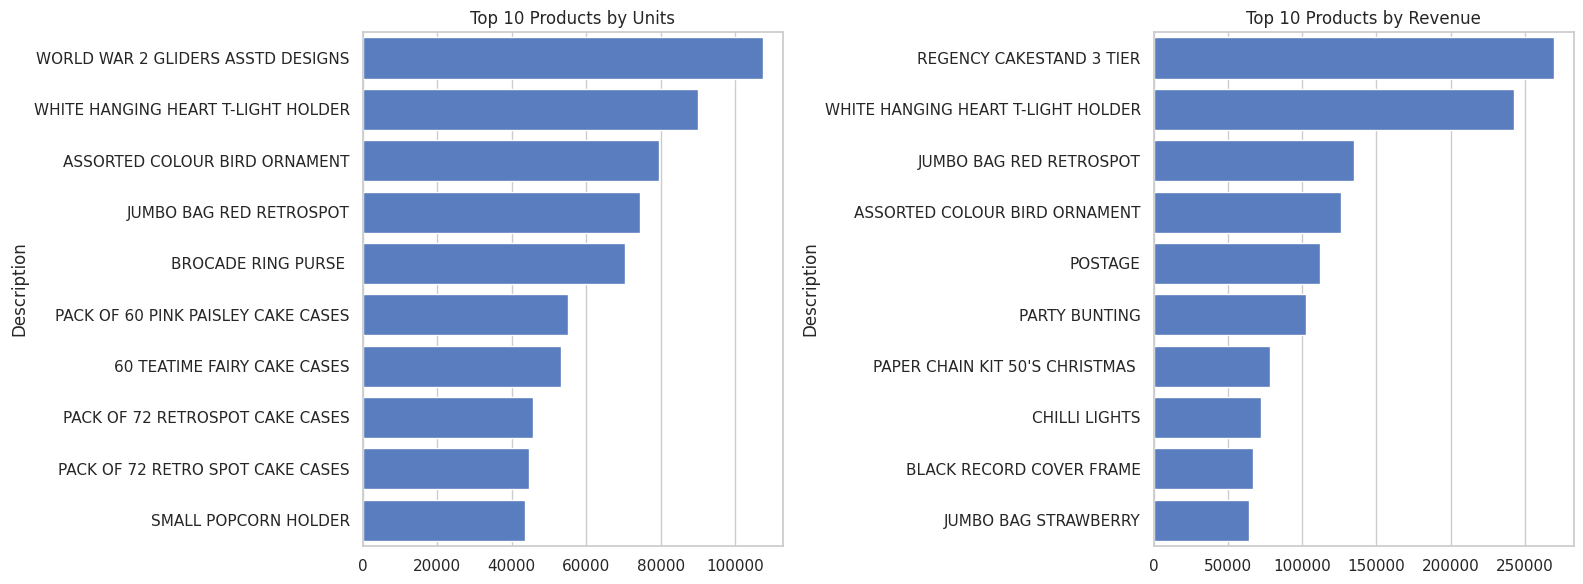

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.barplot(y=top_units.index, x=top_units.values, ax=axes[0])
axes[0].set_title("Top 10 Products by Units")

sns.barplot(y=top_revenue.index, x=top_revenue.values, ax=axes[1])
axes[1].set_title("Top 10 Products by Revenue")

plt.tight_layout()
plt.show()

#Q3: Which customers are most valuable (RFM analysis)?

Explanation:

Recency: days since last purchase (lower is better).

Frequency: number of distinct invoices.

Monetary: total spending.

Quartiles are used to score each dimension (1–4). High-value customers have RFMScore like 444.

*   RFM = Recency, Frequency, Monetary
*   Reference date: max InvoiceDate + 1 day

In [ ]:
reference_date = df_Aug["InvoiceDate"].max() + pd.Timedelta(days=1)

rfm = df_Aug.groupby("Customer ID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,
    "Invoice": "nunique",
    "Revenue": "sum"
})

rfm.rename(columns={"InvoiceDate":"Recency", "Invoice":"Frequency", "Revenue":"Monetary"}, inplace=True)


rfm["R_quartile"] = pd.qcut(rfm["Recency"], 4, labels=[4,3,2,1])
rfm["F_quartile"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1,2,3,4])
rfm["M_quartile"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])


rfm["RFMScore"] = rfm["R_quartile"].astype(str) + rfm["F_quartile"].astype(str) + rfm["M_quartile"].astype(str)

rfm.head(10)

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFMScore
Customer ID,,,,,,,
12346.0,326,17,-64.68,2,4,1,241
12347.0,2,8,5633.32,4,3,4,434
12348.0,75,5,2019.40,3,3,3,333
12349.0,19,5,4404.54,4,3,4,434
12350.0,310,1,334.40,2,1,2,212
12351.0,375,1,300.93,2,1,1,211
12352.0,36,13,1889.21,3,4,3,343
12353.0,204,2,406.76,2,1,2,212
12354.0,232,1,1079.40,2,1,3,213


Seasonality or weekday/hour patterns in order volume?

Extracting date parts

In [ ]:
df_Aug["YearMonth"] = df_Aug["InvoiceDate"].dt.to_period("M")
df_Aug["Weekday"] = df_Aug["InvoiceDate"].dt.day_name()
df_Aug["Hour"] = df_Aug["InvoiceDate"].dt.hour

#Q4:What are the Monthly sales trend?

Explanation:
The chart shows that monthly revenue fluctuates with noticeable dips in early 2010 and mid-2011,followed by strong growth towards the end of 2011.Overall,there is a clear upward trend,with peaks indicating possible seasonal or campaign-driven effects.

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='YearMonth'>

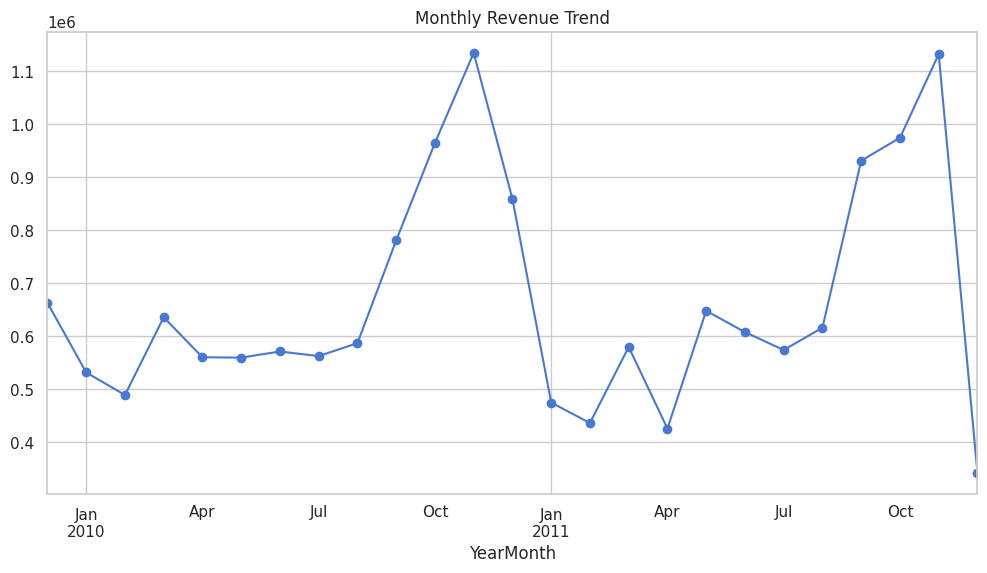

In [ ]:
monthly_sales = df_Aug.groupby("YearMonth")["Revenue"].sum()

monthly_sales.plot(kind="line", marker="o", figsize=(12,6), title="Monthly Revenue Trend")

#Q5: What are the Orders by weekday (using countplot)?

Explanation:

Computes average order value per invoice.

Tracks trend over time & compares across customer segments (like country).

Useful for pricing and promotional strategies.

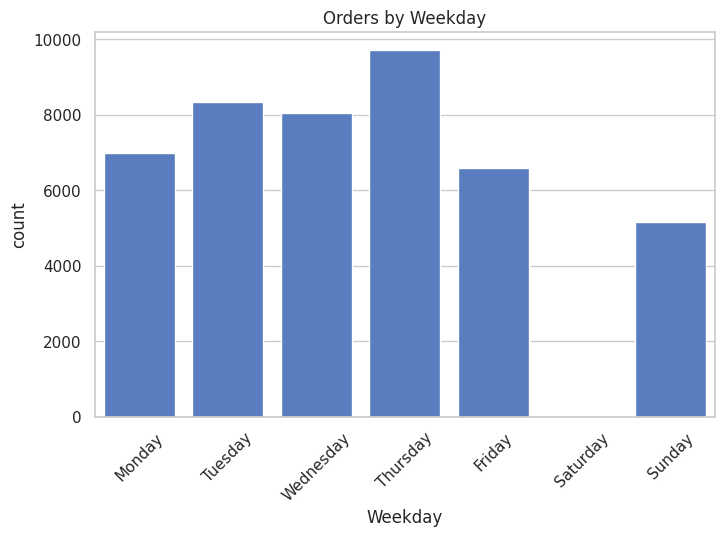

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="Weekday",
              data=df_Aug.drop_duplicates("Invoice"),
              order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Orders by Weekday")
plt.xticks(rotation=45)
plt.show()

#Q6: What are the Orders by hour

Explanation:

Identifies overall return rate.

Products and customers with most returns → helps improve product descriptions.

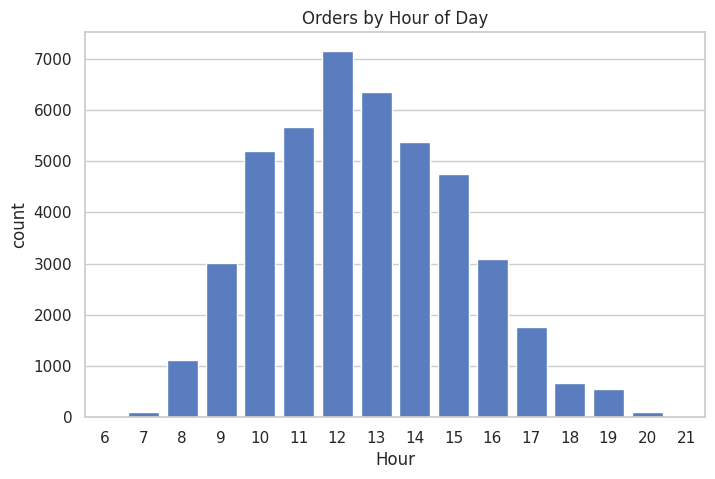

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="Hour", data=df_Aug.drop_duplicates("Invoice"))
plt.title("Orders by Hour of Day")
plt.show()

#Q7: What is the rate/pattern of returns and which products/customers have highest return rates?

Explanation:
The chart highlights the top ten products with highest return quantities,where the items "ROTATING SILVER ANGELS T-LIGHT HLDL"have significant return rates,which can help businesses identify and address issues affecting customer satisfaction and product quality.

Returns: Quantity < 0

In [ ]:
returns = df_Aug[df_Aug["Quantity"] < 0]

# Return rate overall

In [ ]:
return_rate = len(returns["Invoice"].unique()) / len(df_Aug["Invoice"].unique())
print("Return rate (by invoices): {:.2%}".format(return_rate))

Return rate (by invoices): 17.61%


#Top returned products

In [ ]:
top_returns = returns.groupby("Description")["Quantity"].sum().sort_values().head(10)

#Customers with most returns

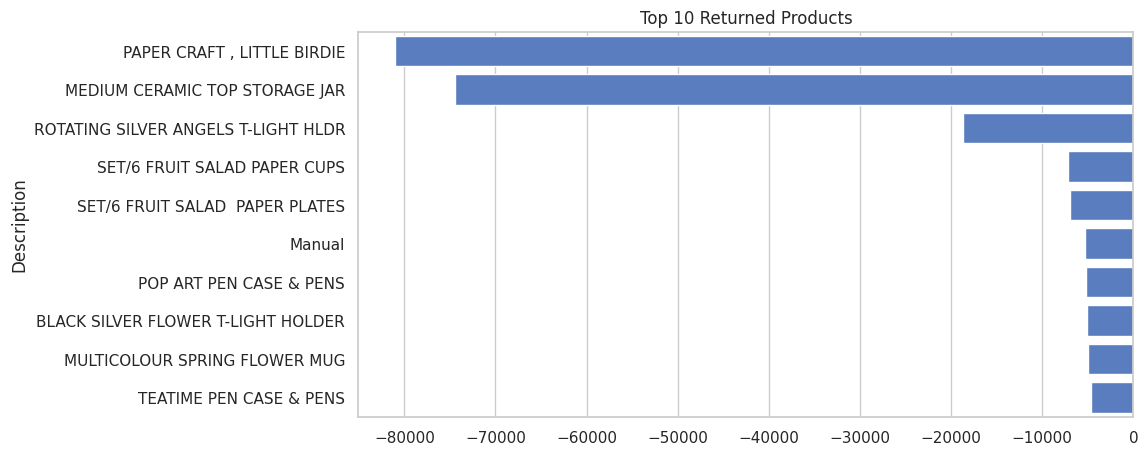

In [ ]:
customer_returns = returns.groupby("Customer ID")["Quantity"].sum().sort_values().head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_returns.index, x=top_returns.values)
plt.title("Top 10 Returned Products")
plt.show()

#Q8: What are the geographic patterns in sales (by country)?

Explanation: Ranks countries by revenue. Helps client target promotions or shipping logistics in strongest regions.

Revenue by country

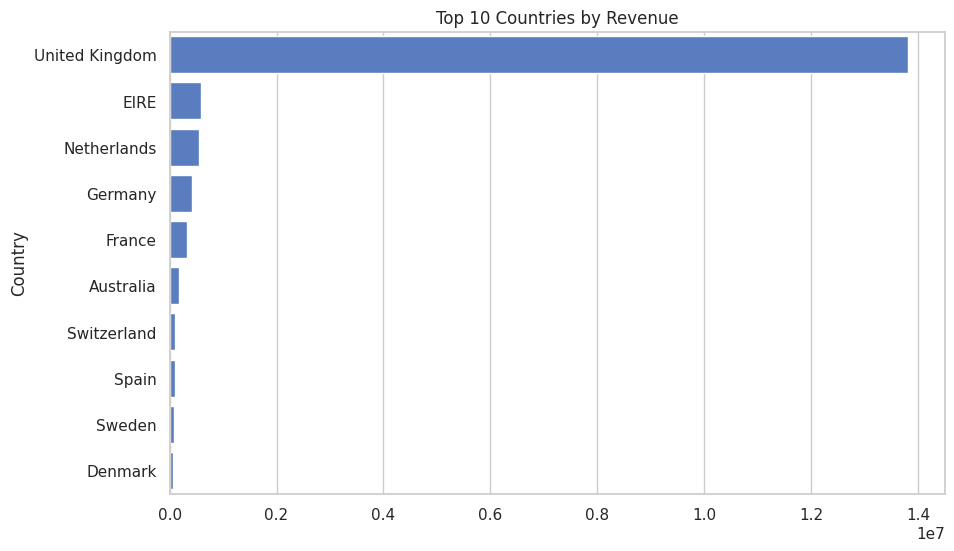

In [ ]:
country_sales = df_Aug.groupby("Country")["Revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(y=country_sales.index[:10], x=country_sales.values[:10])
plt.title("Top 10 Countries by Revenue")
plt.show()

#Q9: How does average order value vary by time or customer segment?

Explanation:

Average Order Value (AOV) = revenue per invoice

In [ ]:
order_values = df_Aug.groupby("Invoice")["Revenue"].sum()

Merge back with invoice date & customer

In [ ]:
invoice_meta = df_Aug.drop_duplicates("Invoice")[["Invoice","InvoiceDate","Customer ID","Country"]]
order_df_Aug = invoice_meta.merge(order_values, left_on="Invoice", right_index=True)

By month

In [ ]:
order_df_Aug["YearMonth"] = order_df_Aug["InvoiceDate"].dt.to_period("M")
aov_month = order_df_Aug.groupby("YearMonth")["Revenue"].mean()

<Axes: title={'center': 'Average Order Value by Month'}, xlabel='YearMonth'>

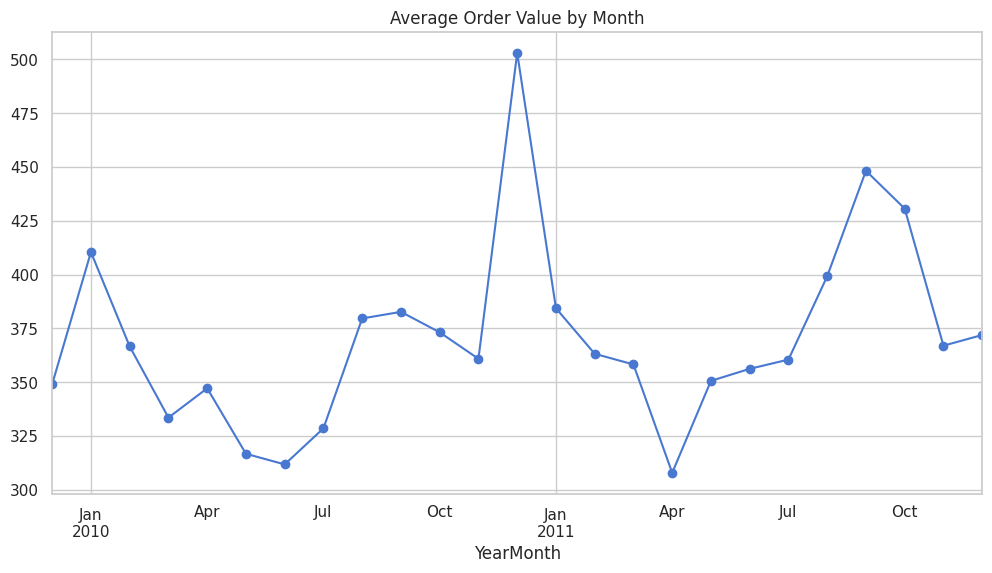

In [ ]:
aov_month.plot(kind="line", marker="o", title="Average Order Value by Month", figsize=(12,6))

By month

In [ ]:
order_df_Aug["YearMonth"] = order_df_Aug["InvoiceDate"].dt.to_period("M")
aov_month = order_df_Aug.groupby("YearMonth")["Revenue"].mean()

<Axes: title={'center': 'Average Order Value by Month'}, xlabel='YearMonth'>

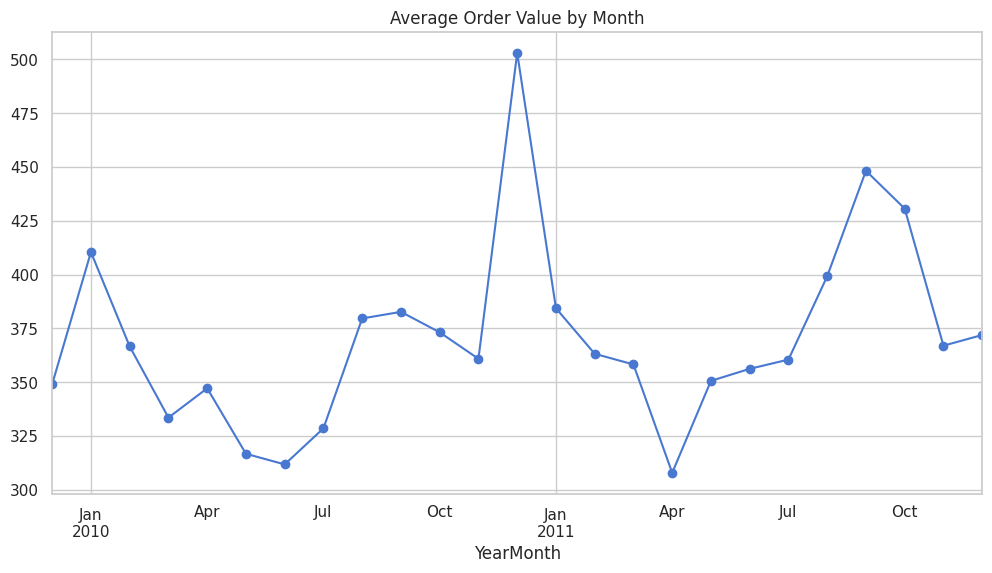

In [ ]:
aov_month.plot(kind="line", marker="o", title="Average Order Value by Month", figsize=(12,6))

By country (top 5)

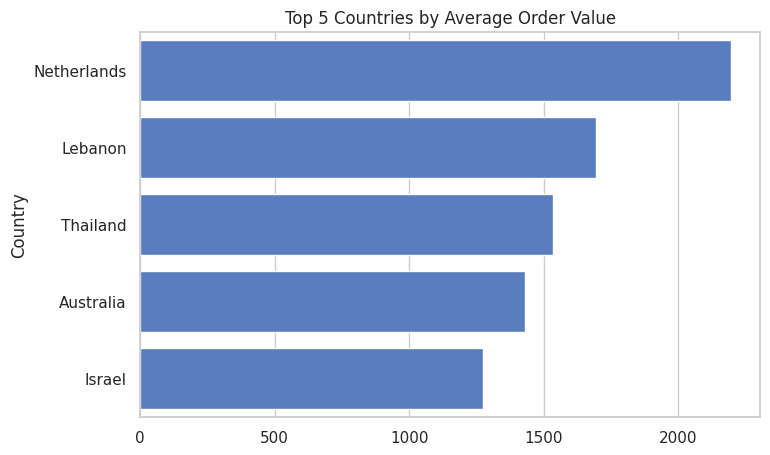

In [ ]:
aov_country = order_df_Aug.groupby("Country")["Revenue"].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=aov_country.values, y=aov_country.index)
plt.title("Top 5 Countries by Average Order Value")
plt.show()

Conclusions & Insights

From the analysis, several key findings emerged:

Top Products & Revenue Drivers

A small set of products contributes disproportionately to total revenue.

Some products are ordered in very large volumes, suggesting bulk-buying customers.

Customer Value (RFM Analysis)

Customers can be segmented into “champions”, “loyal customers”, “at risk”, and “lost” segments.

The top 5% of customers drive a large portion of revenue, so retention efforts should target them.

Seasonality & Time Trends

Strong peaks in sales during November–December (holiday season).

Weekly trend shows higher activity mid-week (Tuesday–Thursday).

Most orders are placed during working hours (9 AM – 3 PM).

Returns

Some products have abnormally high return rates.

A small set of customers accounts for a large portion of returns.

Business should review product quality, descriptions, or customer abuse of return policies.

Product Bundles (Market-Basket Analysis)

Frequently co-purchased items were identified.

These can be promoted together as bundles or “Frequently Bought Together” suggestions.

Geographic Insights

The majority of revenue comes from the UK, but notable demand exists in Germany, France, and the Netherlands.

Some countries contribute minimal revenue and may not justify high logistics costs.

Average Order Value

AOV varies by geography and time.

UK customers place frequent but lower-value orders, while international orders tend to be larger but less frequent.

Recommendations

Focus on best-selling products: Ensure stock availability and consider targeted promotions.

Customer retention: Build loyalty programs for high-value customers (e.g., top RFM segment).

Seasonal promotions: Increase marketing and inventory before peak holiday months.

Reduce returns: Investigate top-returned products, improve descriptions, or adjust return policy.

Cross-sell bundles: Promote frequently bought-together items via website recommendations.

Geographic strategy: Strengthen logistics in top-performing EU markets, review low-performing ones.

In [ ]:
!jupyter nbconvert --to html Final_Project_AI\&App_-2.ipynb

[NbConvertApp] Converting notebook Final_Project_AI&App_-2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 10 image(s).
[NbConvertApp] Writing 973209 bytes to Final_Project_AI&App_-2.html
